## Assignment 2

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
 
data = pd.read_csv('../household_power_consumption.txt', sep=";",parse_dates=[['Date', 'Time']], header=0, dtype={"Global_active_power": float, 
                                                                                'Global_reactive_power': float,
                                                                               'Voltage': float, 'Global_intensity': float,
                                                                               'Sub_metering_1': float, 'Sub_metering_2': float, 'Sub_metering_3':float})


data.dropna(inplace=True)
data.set_index('Date_Time')


Using TensorFlow backend.


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [2]:
def computeEnergyConsumption(global_active_power, sub_metering_1,sub_metering_2,sub_metering_3):
    return (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) 
    
data['Energy_Consumption'] = data.apply(lambda x: computeEnergyConsumption(x['Global_active_power'], x['Sub_metering_1'],x['Sub_metering_2'],x['Sub_metering_3']), axis=1)
data[:20]

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_Consumption
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,39.666667
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,43.700000
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,43.666667
8,2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,43.133333
9,2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,43.033333


In [3]:
def plotGraphs(col):
    plt.figure()
    plt.plot(data['Date_Time'], data[col])

    plt.title(col)
    plt.gcf().autofmt_xdate() # Rotation
    plt.show()

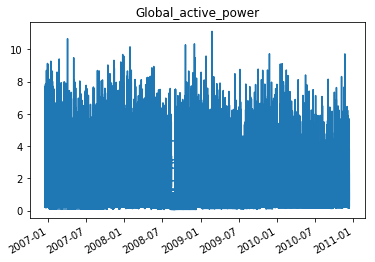

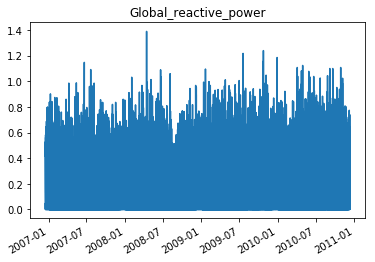

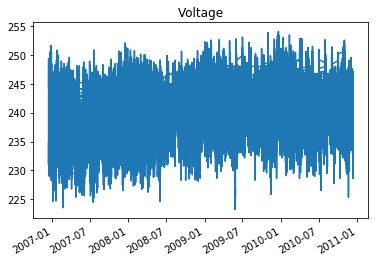

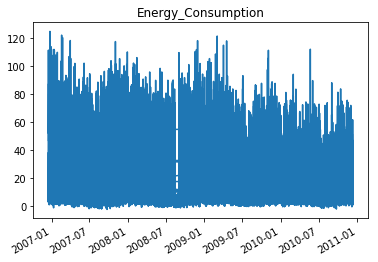

In [4]:
plotGraphs('Global_active_power')
plotGraphs('Global_reactive_power')
plotGraphs('Voltage')
plotGraphs('Energy_Consumption')


In [5]:
def normalize(col):
    mean = np.mean(data[col])
    std = np.std(data[col])
    data[col] = (data[col]-mean)/std

In [8]:
energyMean = np.mean(data['Energy_Consumption'])
energyStd = np.std(data['Energy_Consumption'])
normalize('Global_active_power')
normalize('Global_reactive_power')
normalize('Voltage')
normalize('Global_intensity')
normalize('Sub_metering_1')
normalize('Sub_metering_2')
normalize('Sub_metering_3')
normalize('Energy_Consumption')

data = data.drop(columns=['Date_Time'])
data[:20]


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_Consumption
0,2.955077,2.610721,-1.851816,3.098789,-0.182337,-0.051274,1.249421,4.480739
1,4.037085,2.770406,-2.225274,4.133800,-0.182337,-0.051274,1.130897,6.574088
2,4.050326,3.320432,-2.330213,4.133800,-0.182337,0.120487,1.249421,6.389790
3,4.063567,3.355917,-2.191324,4.133800,-0.182337,-0.051274,1.249421,6.518451
4,2.434881,3.586573,-1.592556,2.513782,-0.182337,-0.051274,1.249421,3.524474
5,2.296793,3.533345,-1.796260,2.333780,-0.182337,0.120487,1.249421,3.166310
6,2.468930,3.515602,-1.774655,2.513782,-0.182337,-0.051274,1.249421,3.587066
7,2.467039,3.515602,-1.734532,2.513782,-0.182337,-0.051274,1.249421,3.583589
8,2.436773,3.426888,-2.114163,2.513782,-0.182337,-0.051274,1.249421,3.527952
9,2.431098,3.426888,-2.154287,2.513782,-0.182337,0.120487,1.130897,3.517520


In [9]:
def Preprocess(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [10]:
processedData = Preprocess(data, 1, 1)

In [11]:
processedData[:20]

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,2.955077,2.610721,-1.851816,3.098789,-0.182337,-0.051274,1.249421,4.480739,4.037085,2.770406,-2.225274,4.133800,-0.182337,-0.051274,1.130897,6.574088
2,4.037085,2.770406,-2.225274,4.133800,-0.182337,-0.051274,1.130897,6.574088,4.050326,3.320432,-2.330213,4.133800,-0.182337,0.120487,1.249421,6.389790
3,4.050326,3.320432,-2.330213,4.133800,-0.182337,0.120487,1.249421,6.389790,4.063567,3.355917,-2.191324,4.133800,-0.182337,-0.051274,1.249421,6.518451
4,4.063567,3.355917,-2.191324,4.133800,-0.182337,-0.051274,1.249421,6.518451,2.434881,3.586573,-1.592556,2.513782,-0.182337,-0.051274,1.249421,3.524474
5,2.434881,3.586573,-1.592556,2.513782,-0.182337,-0.051274,1.249421,3.524474,2.296793,3.533345,-1.796260,2.333780,-0.182337,0.120487,1.249421,3.166310
6,2.296793,3.533345,-1.796260,2.333780,-0.182337,0.120487,1.249421,3.166310,2.468930,3.515602,-1.774655,2.513782,-0.182337,-0.051274,1.249421,3.587066
7,2.468930,3.515602,-1.774655,2.513782,-0.182337,-0.051274,1.249421,3.587066,2.467039,3.515602,-1.734532,2.513782,-0.182337,-0.051274,1.249421,3.583589
8,2.467039,3.515602,-1.734532,2.513782,-0.182337,-0.051274,1.249421,3.583589,2.436773,3.426888,-2.114163,2.513782,-0.182337,-0.051274,1.249421,3.527952
9,2.436773,3.426888,-2.114163,2.513782,-0.182337,-0.051274,1.249421,3.527952,2.431098,3.426888,-2.154287,2.513782,-0.182337,0.120487,1.130897,3.517520
10,2.431098,3.426888,-2.154287,2.513782,-0.182337,0.120487,1.130897,3.517520,3.174505,3.320432,-2.462930,3.368791,-0.182337,-0.051274,1.249421,4.884108


## Question 2:

In [12]:
# 913 is 2 and half years to train and the rest for testing 
# split into train and test sets
values = processedData.values
n_train_hours = 913 * 24 * 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1314720, 1, 15) (1314720,) (734559, 1, 15) (734559,)


In [13]:
print(train_y[1])
print(train_X[1])

6.3897900790000355
[[ 4.03708463  2.77040557 -2.2252745   4.13379998 -0.18233673 -0.05127425
   1.13089735  6.57408829  4.05032598  3.32043153 -2.33021323  4.13379998
  -0.18233673  0.12048729  1.24942076]]


Here we can see the the energy consumption value of the current minute. This is the target that we wick to predict. The features are the energy consumption of the previous minute and also there are all the metrics of the previous and the current minute.

In [23]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_y, epochs=25, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 1314720 samples, validate on 734559 samples
Epoch 1/5
 - 59s - loss: 0.0554 - acc: 0.0000e+00 - val_loss: 0.0224 - val_acc: 0.0000e+00
Epoch 2/5
 - 53s - loss: 0.0311 - acc: 0.0000e+00 - val_loss: 0.0128 - val_acc: 0.0000e+00
Epoch 3/5
 - 53s - loss: 0.0271 - acc: 0.0000e+00 - val_loss: 0.0153 - val_acc: 0.0000e+00
Epoch 4/5
 - 56s - loss: 0.0241 - acc: 0.0000e+00 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 5/5
 - 49s - loss: 0.0213 - acc: 0.0000e+00 - val_loss: 0.0161 - val_acc: 0.0000e+00


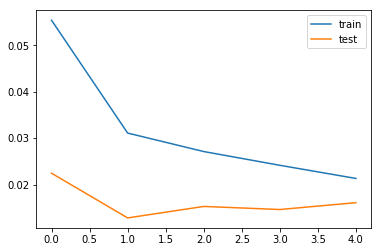

In [24]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


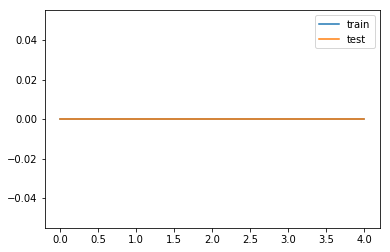

In [25]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [19]:
preds = model.predict(test_X)


In [ ]:
def revertNormalization(val):
    return val*energyStd + energyMean

predsDF = pd.DataFrame(data = preds)
predsDF.apply(lambda x: revertNormalization(x), axis=1)